In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

In [ ]:
def showImage(image):
  plt.figure(figsize=(20, 10))
  plt.imshow(image)

In [ ]:
import torch
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(

In [ ]:
pip install numpy scipy scikit-image matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
uris = [
    'cat.jpg',
    'knife.jpg',
    'goat.jpg',
    'car.jpg'
]


In [ ]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

In [ ]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

In [ ]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

In [ ]:
best_results_per_input

[[array([[0.05702318, 0.31203267, 0.12742469, 0.39164773],
         [0.2837303 , 0.19430773, 0.70854235, 0.6052686 ],
         [0.6429658 , 0.2160457 , 0.9493729 , 0.57596874],
         [0.19444692, 0.17185941, 0.5741886 , 0.673872  ]], dtype=float32),
  array([75, 16, 16, 16]),
  array([0.45965877, 0.544836  , 0.7340185 , 0.7441731 ], dtype=float32)],
 [array([[0.37277865, 0.13376331, 0.5914126 , 0.74966717],
         [0.0129005 , 0.42312175, 0.34066436, 0.9067022 ],
         [0.0161556 , 0.40801916, 0.33183637, 0.8672385 ]], dtype=float32),
  array([44, 44, 45]),
  array([0.4410133 , 0.46642432, 0.49039394], dtype=float32)],
 [array([[-0.00492832,  0.06503582,  0.8317094 ,  0.9923229 ]],
        dtype=float32),
  array([1]),
  array([0.99011517], dtype=float32)],
 [array([[-0.01136884,  0.19349825,  0.98735726,  0.8575512 ]],
        dtype=float32),
  array([3]),
  array([0.9512234], dtype=float32)]]

In [ ]:
classes_to_labels = utils.get_coco_object_dictionary()

In [ ]:
classes_to_labels

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

4


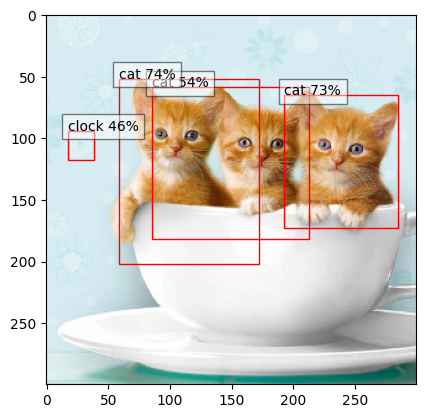

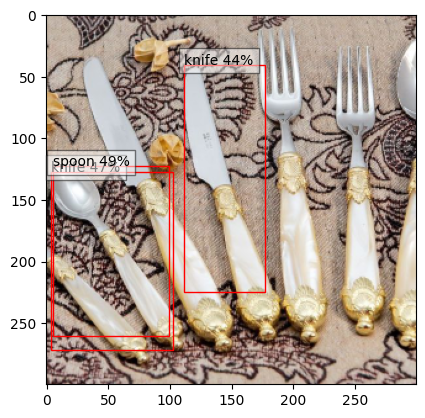

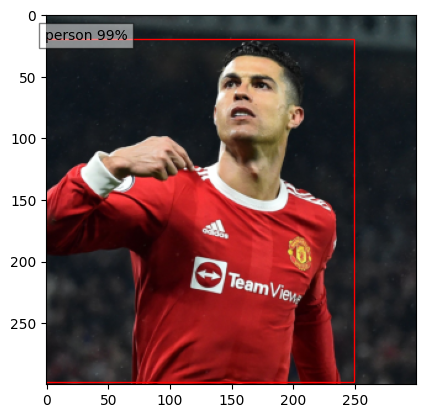

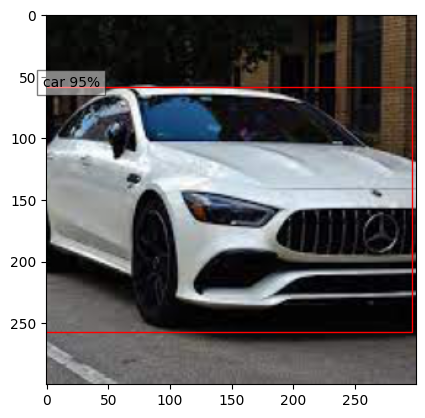

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

print(len(best_results_per_input))
for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)

    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)

    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()